Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Импортируем датасет

In [2]:
data = pd.read_csv('train.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(891, 12)

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 891


In [6]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 177, 19.87%.


In [7]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


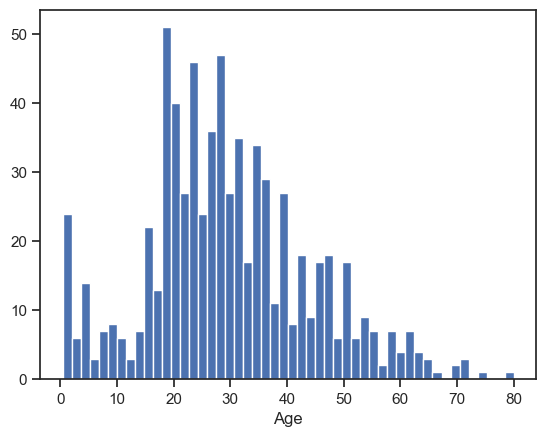

In [8]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [9]:
data_num_Age = data_num[['Age']]
data_num_Age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [11]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Age)


In [12]:
strategies=['mean', 'median', 'most_frequent']

In [13]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Age)
    return data_num_imp[mask_missing_values_only]

In [14]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28

In [15]:
strategy = 'mean'  # Используем среднее значение для заполнения пропущенных значений

# Создание объекта SimpleImputer с выбранной стратегией
imputer = SimpleImputer(strategy=strategy)

# Применение импутации только к столбцу 'Age'
age_imputed = imputer.fit_transform(data[['Age']])

# Замена пропущенных значений в столбце 'Age' на импутированные
data['Age'] = age_imputed

# Вывод обновленного датасета
print(data)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

Категориальные данные

In [16]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Cabin. Тип данных object. Количество пустых значений 687, 77.1%.
Колонка Embarked. Тип данных object. Количество пустых значений 2, 0.22%.


In [17]:
cat_temp_data = data[['Embarked']]
cat_temp_data.head()


,Embarked
0,S
1,C
2,S
3,S
4,S


In [18]:
cat_temp_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
cat_temp_data[cat_temp_data['Embarked'].isnull()].shape

(2, 1)

In [20]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [22]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['C', 'Q', 'S'], dtype=object)

In [23]:
cat_temp_data2 = data[['Cabin']]
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data2)
data_imp3

array([['NA'],
       ['C85'],
       ['NA'],
       ['C123'],
       ['NA'],
       ['NA'],
       ['E46'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['G6'],
       ['C103'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['D56'],
       ['NA'],
       ['A6'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['C23 C25 C27'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['B78'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['D33'],
       ['NA'],
       ['B30'],
       ['C52'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['B28'],
       ['C83'],
       ['NA'],
       ['NA'],
   

In [26]:
# data['Cabin']=data_imp3
# data

## **Преобразование категориальных признаков в числовые**

In [27]:
cat_enc = pd.DataFrame({'Cabin':data_imp2.T[0]})
cat_enc

,Cabin
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [28]:
from sklearn.preprocessing import LabelEncoder
cat_enc['Cabin'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['Cabin'])

In [30]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем
# задачу классификации и каждое значение категории соответствует
# какому-либо классу целевого признака

le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [31]:
cat_enc_le

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [32]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [33]:
le.inverse_transform([0, 1, 2])

array(['C', 'Q', 'S'], dtype=object)

## **Масштабирование данных**

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [35]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Fare']])

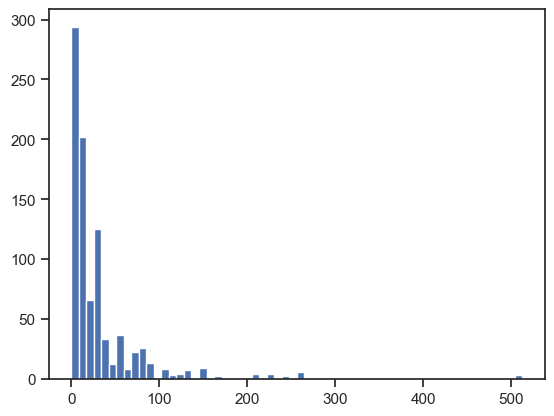

In [36]:
plt.hist(data['Fare'], 60)
plt.show()

In [37]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Fare']])

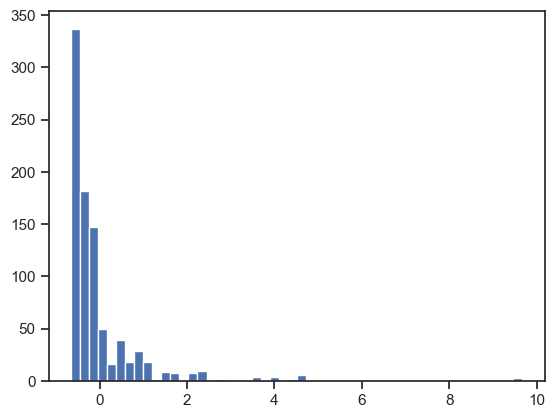

In [38]:
plt.hist(sc2_data, 50)
plt.show()